# 개요

![대체 텍스트](https://storage.googleapis.com/gcp-community/tutorials/standalone-tensorflow-raspberry-pi/standalone_tensorflow_img1.png)

위의 모델을 다음과 같이 수정 할 것



1.   데이터는 G-drive에 저장
2.   Tensorflow 모델 학습은 Colab사용
3.   학습된 모델은 github에 저장
4.   Device에서 github에서 모델 loading
5.   Device에서 서비스 수행



# 개발환경 만들기(option)

https://code.visualstudio.com/ 에서 vscode 받기

https://desktop.github.com/ 에서 githug desktop 받기

github에서 repository 만들고 

desktop에 작업용 repo clone하기

# 라즈베리 설정

## 목차



1.   os 설치
2.   유선렌 설정
3.   vnc설정 
4.   카메라 설정
5.   opencv 설치
6.   tensorflow lite 설치
7.   작업용 github 열기




## OS

[Raspbian Buster with desktop ](https://downloads.raspberrypi.org/raspbian_latest) 


[SDcard_loader](https://www.balena.io/etcher/)

## 인터넷 설정



```
sudo nano /etc/dhcpcd.conf
```
에서
```
...
static ip_address=0.0.0.0/port
static routers=0.0.0.0
...
```
로 수정



## vnc& camera 설정



```
sudo raspi-config
```

에서
*Interfacing Option*항목의 *VNC*와 *Camera* 를 모두 enable 시킨다.



[desktop's vnc viewer](https://www.realvnc.com/en/connect/download/viewer/)

## opencv 설치



```
sudo apt-get autoremove
sudo apt-get install pkg-config
sudo apt-get update
sudo apt-get upgrade
sudo apt-get install build-essential cmake
sudo apt-get install libjpeg-dev libtiff5-dev libjasper-dev libpng12-dev
sudo apt-get install libavcodec-dev libavformat-dev libswscale-dev libv4l-dev
sudo apt-get install libxvidcore-dev libx264-dev libxine2-dev v4l-utils


sudo apt-get install libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev
sudo apt-get install libgtk2.0-dev
sudo apt-get install mesa-utils libgl1-mesa-dri libgtkgl2.0-dev libgtkglext1-dev
sudo apt-get install libatlas-base-dev gfortran libeigen3-dev
sudo apt-get install python3.0-dev python3-numpy

mkdir opencv
cd opencv
wget -O opencv.zip https://github.com/opencv/opencv/archive/4.1.2.zip
unzip opencv.zip
wget -O opencv_contrib.zip https://github.com/opencv/opencv_contrib/archive/4.1.2.zip
unzip opencv_contrib.zip
cd opencv-4.1.2
mkdir build
cd build

cmake -D CMAKE_BUILD_TYPE=RELEASE \
-D CMAKE_INSTALL_PREFIX=/usr/local \
-D WITH_TBB=OFF \
-D WITH_IPP=OFF \
-D WITH_1394=OFF \
-D BUILD_WITH_DEBUG_INFO=OFF \
-D BUILD_DOCS=OFF \
-D INSTALL_C_EXAMPLES=ON \
-D INSTALL_PYTHON_EXAMPLES=ON \
-D BUILD_EXAMPLES=OFF \
-D BUILD_TESTS=OFF \
-D BUILD_PERF_TESTS=OFF \
-D ENABLE_NEON=ON \
-D ENABLE_VFPV3=ON \
-D WITH_QT=OFF \
-D WITH_GTK=ON \
-D WITH_OPENGL=ON \
-D OPENCV_ENABLE_NONFREE=ON \
-D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib-4.1.2/modules \
-D WITH_V4L=ON \
-D WITH_FFMPEG=ON \
-D WITH_XINE=ON \
-D ENABLE_PRECOMPILED_HEADERS=OFF \
-D BUILD_NEW_PYTHON_SUPPORT=ON \
-D OPENCV_GENERATE_PKGCONFIG=ON ../

```

`sudo nano /etc/dphys-swapfile` 에서

CONF_SWAPSIZE=2048 으로 수정

`sudo /etc/init.d/dphys-swapfile restart`



```
time make -j4
make
sudo make install
sudo ldconfig
```


`sudo nano /etc/dphys-swapfile`에서

CONF_SWAPSIZE=100 으로 수정

`sudo /etc/init.d/dphys-swapfile restart`








### 확인



```
python3 
>>> import cv2
```



## tensorflow lite 설치

(https://dl.google.com/coral/python/tflite_runtime-1.14.0-cp37-cp37m-linux_armv7l.whl)

다운로드 후 


```
pip3 install tflite_runtime-1.14.0-cp37-cp37m-linux_armv7l.whl
```

끝


## 작업용 github 열기

이미 git가 설치 되어있으므로 


```
git clone https//...
```

raspi에 clone하기 


# 이미지 전처리

## sample image 다운로드

In [0]:
!wget --no-check-certificat --content-disposition https://raw.githubusercontent.com/hoo0681/raspi4withTF/master/sample2.jpg

--2020-01-27 08:11:54--  https://raw.githubusercontent.com/hoo0681/raspi4withTF/master/sample2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4556765 (4.3M) [image/jpeg]
Saving to: ‘sample2.jpg.1’

sample2.jpg.1       100%[===================>]   4.34M  16.2MB/s    in 0.3s    

2020-01-27 08:11:55 (16.2 MB/s) - ‘sample2.jpg.1’ saved [4556765/4556765]



In [0]:
import cv2 
import matplotlib.pyplot as plt
cv2.__version__

'4.1.2'

## **opencv는 이미지를 BGR로 가져온다**

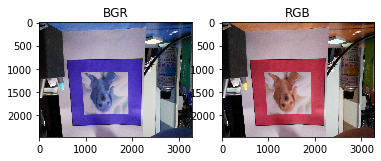

In [0]:
img=cv2.imread('/content/sample2.jpg')

plt.subplot(1,2,1)
plt.title('BGR')
plt.imshow(img)

RGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.title('RGB')
plt.imshow(RGB)

## **이미지는 뒤집혀 있을 수 있다**

(2464, 3280, 3)

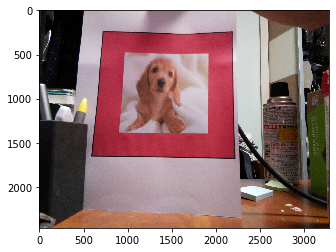

In [0]:
frame=cv2.flip(RGB,0)
plt.imshow(frame)
frame.shape

## **원본이미지는 너무 크다**

(1232, 1640, 3)

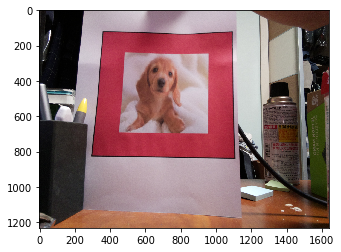

In [0]:
frame= cv2.resize(frame,(205*8,154*8))
plt.imshow(frame)
frame.shape

## 색필터 적용하기
![HSV색공간](https://t1.daumcdn.net/cfile/tistory/27371C4C594894D807)

hsv색공간은 색상, 채도, 명도를 기준으로  색이 표현 되기 때문에 인접한 색의 범위를 정하기 용이하다.

In [0]:
hsv=cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)

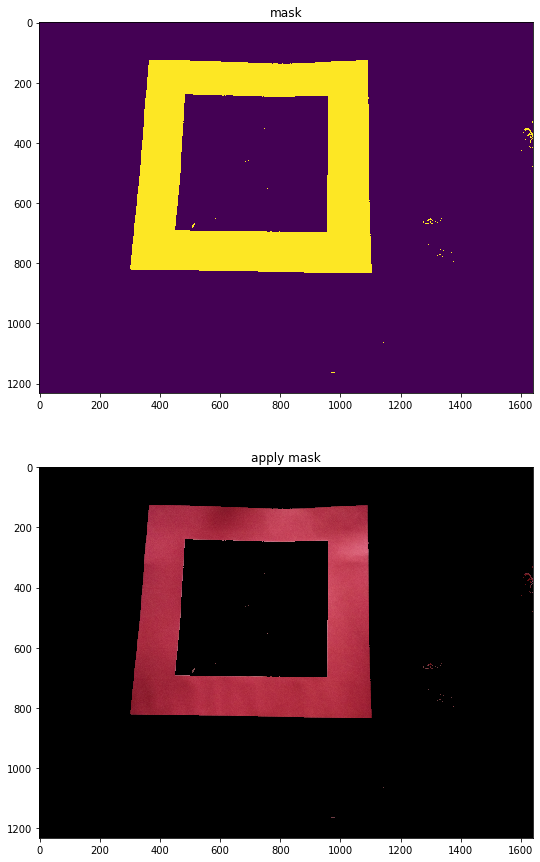

In [0]:
red_mask_2=cv2.inRange(hsv,(170,100,100),(180,255,255))
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.title('mask')
plt.imshow(red_mask_2)
plt.subplot(2,1,2)
plt.title('apply mask')
plt.imshow(cv2.bitwise_and(frame,frame,mask=red_mask_2))

## 윤곽선 찾기

findContours 함수의 소스이미지는 8bit 단일 채널이여야한다.

In [0]:
mask=red_mask_2.astype('uint8')

## findContour
contours, hierachy = cv2.findContours(image, mode, method)

> image: 흑백이미지 또는 이진화된 이미지 


> mode : 컨투어를 찾는 방법
*   cv2.RETR_EXTERNAL: 컨투어 라인 중 가장 바깥쪽의 라인만 찾음
*   cv2.RETR_LIST: 모든 컨투어 라인을 찾지만, 상하구조(hierachy)관계를 구성하지 않음
*   cv2.RETR_CCOMP: 모든 컨투어 라인을 찾고, 상하구조는 2 단계로 구성함
*   cv2.RETR_TREE: 모든 컨투어 라인을 찾고, 모든 상하구조를 구성함

> method : 컨투어를 찾을 때 사용하는 근사화 방법
*   cv2.CHAIN_APPROX_NONE: 모든 컨투어 포인트를 반환
*   cv2.CHAIN_APPROX_SIMPLE: 컨투어 라인을 그릴 수 있는 포인트만 반환
*   cv2.CHAIN_APPROX_TC89_L1: Teh_Chin 연결 근사 알고리즘 L1 버전을 적용하여 컨투어 포인트를 줄임
*   cv2.CHAIN_APPROX_TC89_KCOS: Teh_Chin 연결 근사 알고리즘 KCOS 버전을 적용하여 컨투어 포인트를 줄임









In [0]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

## contour그리기



```
img=cv2.drawContours(source,contours,contour_idx,color,thickness)
```



> source: 소스이미지 수정되므로 원본을 유지하려면 copy하여 넘겨야한다.


> contours: 컨투어들 


> contour_idx: 그릴 contour의 index를 넣는다. -1이면 전부 그린다.


> color: 그릴 색


> thickness: 그릴 두께



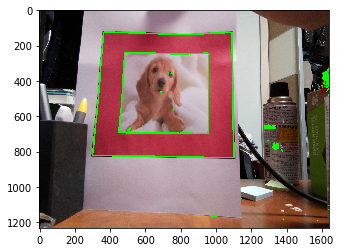

In [0]:



frame_copy=frame.copy()
#contours.sort(key=cv2.contourArea,reverse=True)
contour_idx= -1 #ALL
img_contour=cv2.drawContours(frame_copy,contours,contour_idx,(0,255,0),7)

plt.imshow(frame_copy)

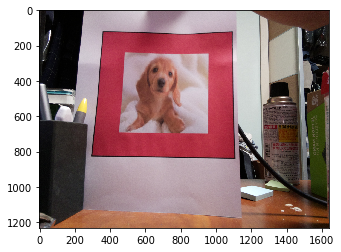

In [0]:
plt.imshow(frame)

## taget 찾기

찾은 contour 중에서 원하는 것을 특정하려면 가장 크거나 작아야한다

In [0]:
c0=max(contours,key=cv2.contourArea)

In [0]:
x,y,w,h=cv2.boundingRect(c0)

In [0]:
rect_img=cv2.rectangle(frame.copy(),(x,y),(x+w,y+h),(0,0,255),7)

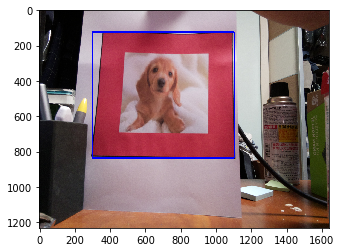

In [0]:
plt.imshow(rect_img)

In [0]:
taget_img=frame[y:y+h,x:x+w,:]

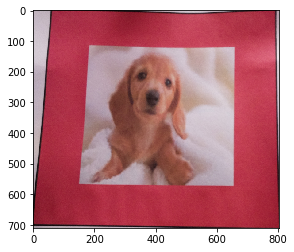

In [0]:
plt.imshow(taget_img)

## 빨간 테두리 제거하기

taget_img의 마스크를 반전한다음 가장 큰 contour를 찾으면 빨간 테두리에 둘러쌓인 이미지를 구할 수 있다.

In [0]:
inv_mask=mask[y:y+h,x:x+w]^0xFF
inv_mask=inv_mask.astype('uint8')


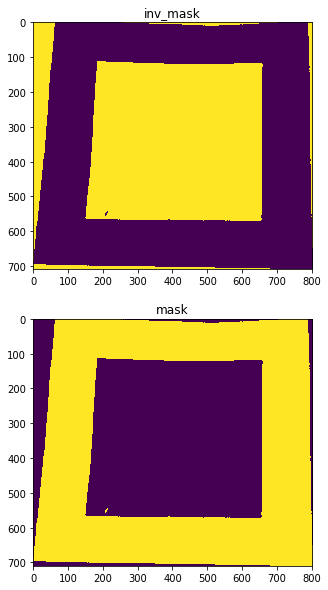

In [0]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('inv_mask')
plt.imshow(inv_mask)
plt.subplot(2,1,2)
plt.title('mask')
plt.imshow(mask[y:y+h,x:x+w])

In [0]:
inv_contours, inv_hierarchy = cv2.findContours(inv_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

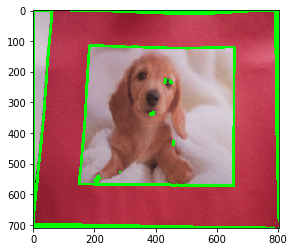

In [0]:
plt.imshow(cv2.drawContours(taget_img.copy(),inv_contours,-1,(0,255,0),7))

In [0]:
inv_c0=max(inv_contours,key=cv2.contourArea)
X_,Y_,W_,H_=cv2.boundingRect(inv_c0)

In [0]:
res_img=frame[y+Y_:y+Y_+H_,x+X_:x+X_+W_,:]


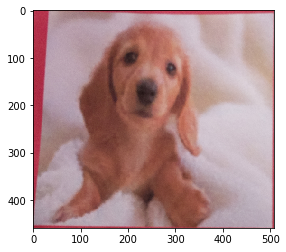

In [0]:
plt.imshow(res_img)

# Tensorflow Lite 사용하기

## 실습용 모델받기

In [0]:
!wget https://storage.googleapis.com/download.tensorflow.org/models/tflite/mobilenet_v1_1.0_224_quant_and_labels.zip

In [0]:
!unzip mobilenet_v1_1.0_224_quant_and_labels.zip

## tensorflow lite 로드하기

IOT디바이스에서는 tflite로 로드되기 때문에 똑같이 맟춘다

IOT에서는

```
import tflite_runtime.interpreter as tflite
```
이렇게 로드한다.


In [0]:
%tensorflow_version 2.x
import tensorflow.lite as tflite

In [0]:
import numpy as np


### 라벨 로드하기

In [0]:
def load_labels(path):
    with open(path, 'r') as f:
        return {i: line.strip() for i, line in enumerate(f.readlines())}

In [0]:
lables=load_labels('/content/labels_mobilenet_quant_v1_224.txt')

### 모델 불러오기

In [0]:
interpreter=tflite.Interpreter(model_path='/content/mobilenet_v1_1.0_224_quant.tflite')

### tensor 할당하기

In [0]:
interpreter.allocate_tensors()

### 입출력 tensor의 numpy view 받기



> interpreter.tensor(index)

모델의 index에 해당하는 tensor의 numpy view를 반환하는 함수를 반환한다.


> interpreter.get_input_details()

모델의 input텐서의 정보가 반환된다


EX)
```
[{'dtype': numpy.uint8,
  'index': 88,
  'name': 'input',
  'quantization': (0.0078125, 128),
  'shape': array([  1, 224, 224,   3], dtype=int32)}]
```





In [0]:
inputs=interpreter.tensor(interpreter.get_input_details()[0]['index'])

In [0]:
outputs=interpreter.tensor(interpreter.get_output_details()[0]['index'])

### 데이터 넣기

In [0]:
inputs()[0][::]=cv2.resize(res_img,(224,224))

### 주의

In [0]:
inputs_=inputs()


interpreter를 이용하던중 tensor와 관련된 오류를 위시한 여러 오류로 인하여 아래와 같은 에러가 발생할 경우 모델 load부터 다시해야한다.



---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-56-7d35ed1dfe14> in <module>()
----> 1 interpreter.invoke()

1 frames
/tensorflow-2.1.0/python3.6/tensorflow_core/lite/python/interpreter.py in _ensure_safe(self)
    273       in the interpreter in the form of a numpy array or slice. Be sure to
    274       only hold the function returned from tensor() if you are using raw
--> 275       data access.""")
    276 
    277   # Experimental and subject to change

RuntimeError: There is at least 1 reference to internal data
      in the interpreter in the form of a numpy array or slice. Be sure to
      only hold the function returned from tensor() if you are using raw
      data access.


-----------------------------------------------------------------------------

In [0]:
interpreter.invoke()

RuntimeError: ignored

### 추론

In [0]:
interpreter.invoke()

### 출력

In [0]:
outputs()[0].shape

(1001,)

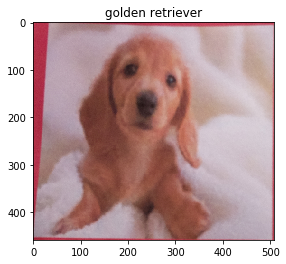

In [0]:
plt.title(str(lables[np.argmax(outputs()[0])]))
plt.imshow(res_img)


### helper func

In [0]:
def load_interperter(model_path):
    interpreter_=tflite.Interpreter(model_path=model_path)
    interpreter_.allocate_tensors()
    input_ =interpreter_.tensor(interpreter_.get_input_details()[0]['index'])
    output = interpreter_.tensor(interpreter_.get_output_details()[0]["index"])
    return {'model':interpreter_,'input':input_,'output':output}

# 다음은
모델 개발하기(transfer learning)